In [1]:
import ROOT as rt

Welcome to JupyROOT 6.28/00


In [2]:
load_path = "./fits/calib_fits/Voigtian/workspace_ggh_All_Zfit_no_e_cut_UL_calib_cat12.root"

In [3]:
file = rt.TFile.Open(load_path)

In [4]:
canvas = rt.TCanvas()
canvas.cd()
mass =  rt.RooRealVar("mh_ggh","mass (GeV)",100,81,101)
frame = mass.frame()

In [5]:

bwWidth = rt.RooRealVar("bwz_Width" , "widthZ", 2.5, 0, 30)
bwmZ = rt.RooRealVar("bwz_mZ" , "mZ", 91.2, 90, 92)
sigma = rt.RooRealVar("sigma" , "sigma", 2, 0.0, 5.0)

bwWidth.setConstant(True)
# bwmZ.setConstant(True)
# sigma.setConstant(True)
#bwmZ.setConstant(True)
model1 = rt.RooVoigtian("Voigtian" , "Voigtian",mass, bwmZ, bwWidth, sigma)

c = rt.RooRealVar("c", "c", -1.0, -10, -0.1)
shift = rt.RooRealVar("shift" , "shift", 91.2, 80, 105)
shifted_mass = rt.RooFormulaVar("shifted_mass", "@0-@1", rt.RooArgList(mass, shift))
model2_1 = rt.RooExponential("Exponential", "Exponential", shifted_mass,c)

center = rt.RooRealVar("center" , "center", 91.2, 80, 105)
coeff = rt.RooRealVar("coeff" , "coeff", 0.9, 0, 1)
erfc_in = rt.RooFormulaVar("erfc_in", "(@2 - @0) * @1", rt.RooArgList(mass, coeff, center)) 
# model2_2 = rt.RooFit.bindFunction("erfc", rt.TMath.Erfc, (center-mass)*coeff)
model2_2 = rt.RooFit.bindPdf("erfc", rt.TMath.Erfc, erfc_in)
model2 = rt.RooProdPdf("erfc_exp", "erfc_exp", rt.RooArgList(model2_1, model2_2))
sigfrac = rt.RooRealVar("sigfrac", "sigfrac", 0.9, 0, 1.0)
model3 = rt.RooAddPdf("model3", "model3", rt.RooArgList(model1, model2),sigfrac)


In [6]:
model2.Print()

RooProdPdf::erfc_exp[ Exponential * erfc ] = 0.000301466


In [ ]:
# minim = rt.RooMinimizer (model1)
# minim.minimize("Minuit2","migrad");  
model2_1.fitTo(file.w.data("data_Zfit_no_e_cut_UL_calib_cat20"))


[#1] INFO:NumericIntegration -- RooRealIntegral::init(Exponential_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)


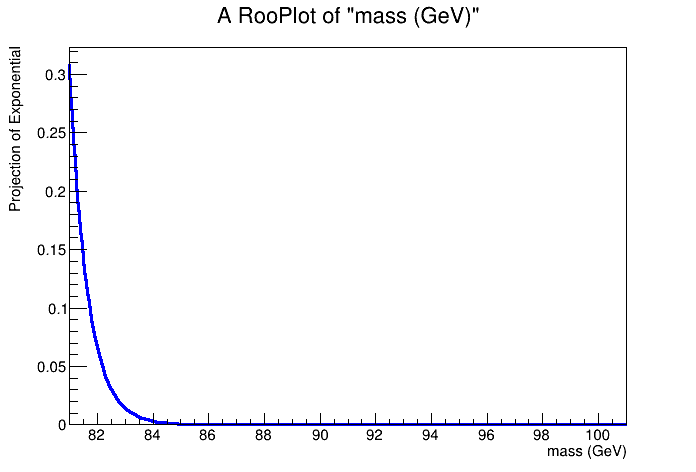

In [7]:

# file.w.pdf("Voigtian_ggh_All").plotOn(frame)
# file.w.data("data_Zfit_no_e_cut_UL_calib_cat20").plotOn(frame)
# model3.plotOn(frame, rt.RooFit.LineColor(rt.kGreen))
# model1.plotOn(frame, rt.RooFit.LineColor(rt.kRed))
model2_1.plotOn(frame, rt.RooFit.LineColor(rt.kBlue))
frame.Draw()
canvas.Update()
canvas.Draw()
